In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Mon Mar  8 12:15:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 164.6MB 84kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670979 sha256=2dd985bb4a140bb2fe5323c17c2a84079ee1f6e6cc633ada8157511fbba2d96d
  Stored in directory: /root/.cache/pip/wheels/65/f4/0d/c9bb958d70c2e015c968cb91cbd7f1b486933056d422337d75
Successfully built h2o


In [5]:
 import h2o

In [6]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbdnaezms
  JVM stdout: /tmp/tmpbdnaezms/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbdnaezms/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_idcxqs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [7]:
from h2o.automl import H2OAutoML

In [11]:
churn_df = h2o.import_file('https://github.com/karthik-DLCVNLP/AutoML/blob/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [12]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [13]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [14]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [15]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No


In [16]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [17]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [18]:
!nvidia-smi

Mon Mar  8 12:24:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
12:25:02.393: Project: AutoML_20210308_122502388
12:25:02.394: Cross-validation disabled by user: no fold column nor nfolds > 1.
12:25:02.394: Setting stopping tolerance adaptively based on the training frame: 0.01421338109037403
12:25:02.394: Build control seed: 10
12:25:02.394: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
12:25:02.499: training frame: Frame key: automl_training_py_2_sid_b43b    cols: 21    rows: 4471  chunks: 8    size: 295655  checksum: -6639420152872322798
12:25:02.499: validation frame: Frame key: py_4_sid_b43b    cols: 21    rows: 1068  chunks: 8    size: 139334  checksum: -4589347225336685357
12:25:02.505: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_b43b    cols: 21    rows: 479  chunks: 8    size: 124536  checksum: 947016593623756702
12:25:02.505: blending frame: NULL
12:25:02.505: response column: Churn
12

In [20]:
!nvidia-smi

Mon Mar  8 12:25:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W /  70W |    138MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
lb = aml.leaderboard

In [22]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210308_122502,0.845944,0.414938,0.622757,0.216294,0.368679,0.135924
GBM_5_AutoML_20210308_122502,0.835503,0.425974,0.628549,0.24687,0.373794,0.139722
GBM_3_AutoML_20210308_122502,0.832723,0.432366,0.644687,0.248757,0.377319,0.14237
GBM_2_AutoML_20210308_122502,0.832588,0.433309,0.635961,0.245469,0.37779,0.142725
GBM_1_AutoML_20210308_122502,0.83148,0.431033,0.62584,0.237469,0.377019,0.142143
XGBoost_3_AutoML_20210308_122502,0.83052,0.430479,0.646208,0.242644,0.37724,0.14231
GBM_4_AutoML_20210308_122502,0.826407,0.441871,0.628094,0.248983,0.381264,0.145362
DRF_1_AutoML_20210308_122502,0.823797,0.452496,0.616732,0.238893,0.379702,0.144173
XGBoost_1_AutoML_20210308_122502,0.82148,0.455299,0.62489,0.268271,0.387174,0.149904
XGBoost_2_AutoML_20210308_122502,0.820565,0.454953,0.592512,0.244757,0.385289,0.148448


In [23]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [24]:
churn_pred.head()

predict,No,Yes
Yes,0.306428,0.693572
No,0.94243,0.0575704
No,0.832127,0.167873
No,0.981142,0.0188583
No,0.97934,0.0206597
No,0.663382,0.336618
No,0.964015,0.0359853
Yes,0.373773,0.626227
Yes,0.470748,0.529252
No,0.910627,0.0893727


In [25]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14758590023932083
RMSE: 0.38416910370215984
LogLoss: 0.4520518067919348
Null degrees of freedom: 1024
Residual degrees of freedom: 979
Null deviance: 1214.7793573756571
Residual deviance: 926.7062039234663
AIC: 1018.7062039234663
AUC: 0.8215836937081863
AUCPR: 0.6423581560461834
Gini: 0.6431673874163726

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35171061750680116: 


,,No,Yes,Error,Rate
0,No,572.0,167.0,0.226,(167.0/739.0)
1,Yes,81.0,205.0,0.2832,(81.0/286.0)
2,Total,653.0,372.0,0.242,(248.0/1025.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.351711,0.623100,188.0
1,max f2,0.099330,0.741047,318.0
2,max f0point5,0.596498,0.649087,87.0
3,max accuracy,0.596498,0.800000,87.0
4,max precision,0.841485,1.000000,0.0
5,max recall,0.011739,1.000000,389.0
6,max specificity,0.841485,1.000000,0.0
7,max absolute_mcc,0.384406,0.460716,173.0
8,max min_per_class_accuracy,0.319282,0.741259,203.0
9,max mean_per_class_accuracy,0.351711,0.745401,188.0



Gains/Lift Table: Avg response rate: 27.90 %, avg score: 28.31 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010732,0.803216,2.932295,2.932295,0.818182,0.814545,0.818182,0.814545,0.031469,0.031469,193.229498,193.229498,0.028762
1,2,0.020488,0.783466,2.867133,2.901265,0.800000,0.792571,0.809524,0.804081,0.027972,0.059441,186.713287,190.126540,0.054028
2,3,0.030244,0.771815,3.225524,3.005865,0.900000,0.778103,0.838710,0.795701,0.031469,0.090909,222.552448,200.586510,0.084143
3,4,0.040000,0.762005,3.225524,3.059441,0.900000,0.768486,0.853659,0.789063,0.031469,0.122378,222.552448,205.944056,0.114259
4,5,0.050732,0.742434,2.280674,2.894701,0.636364,0.753180,0.807692,0.781473,0.024476,0.146853,128.067387,189.470145,0.133321
5,6,0.100488,0.672699,2.600096,2.748829,0.725490,0.706758,0.766990,0.744478,0.129371,0.276224,160.009598,174.882884,0.243747
6,7,0.150244,0.618944,2.319005,2.606484,0.647059,0.644238,0.727273,0.711282,0.115385,0.391608,131.900452,160.648442,0.334775
7,8,0.200000,0.552830,2.037913,2.465035,0.568627,0.588801,0.687805,0.680811,0.101399,0.493007,103.791307,146.503497,0.406403
8,9,0.300488,0.431487,1.287426,2.071224,0.359223,0.493708,0.577922,0.618241,0.129371,0.622378,28.742617,107.122423,0.446464
9,10,0.400000,0.307693,1.264912,1.870629,0.352941,0.368128,0.521951,0.556018,0.125874,0.748252,26.491156,87.062937,0.483028


In [26]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [27]:
model_ids

['GLM_1_AutoML_20210308_122502',
 'GBM_5_AutoML_20210308_122502',
 'GBM_3_AutoML_20210308_122502',
 'GBM_2_AutoML_20210308_122502',
 'GBM_1_AutoML_20210308_122502',
 'XGBoost_3_AutoML_20210308_122502',
 'GBM_4_AutoML_20210308_122502',
 'DRF_1_AutoML_20210308_122502',
 'XGBoost_1_AutoML_20210308_122502',
 'XGBoost_2_AutoML_20210308_122502']

In [28]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20210308_122502


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10467991377106585
RMSE: 0.3235427541625154
LogLoss: 0.32975458280163056
Mean Per-Class Error: 0.16621201574854183
AUC: 0.9127272161370594
AUCPR: 0.7887525477482795
Gini: 0.8254544322741189

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4069718172152837: 


,,No,Yes,Error,Rate
0,No,2914.0,375.0,0.114,(375.0/3289.0)
1,Yes,296.0,886.0,0.2504,(296.0/1182.0)
2,Total,3210.0,1261.0,0.1501,(671.0/4471.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.406972,0.725338,188.0
1,max f2,0.180628,0.809287,281.0
2,max f0point5,0.560318,0.732346,131.0
3,max accuracy,0.481614,0.850816,160.0
4,max precision,0.963676,1.000000,0.0
5,max recall,0.017057,1.000000,382.0
6,max specificity,0.963676,1.000000,0.0
7,max absolute_mcc,0.406972,0.622856,188.0
8,max min_per_class_accuracy,0.328000,0.829103,219.0
9,max mean_per_class_accuracy,0.266762,0.833788,243.0



Gains/Lift Table: Avg response rate: 26.44 %, avg score: 26.39 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010065,0.914882,3.698515,3.698515,0.977778,0.932537,0.977778,0.932537,0.037225,0.037225,269.851476,269.851476,0.036921
1,2,0.020353,0.890186,3.700342,3.699438,0.978261,0.902495,0.978022,0.917351,0.038071,0.075296,270.034209,269.943846,0.074688
2,3,0.030195,0.864114,3.352734,3.586439,0.886364,0.875130,0.948148,0.903590,0.032995,0.108291,235.273419,258.643855,0.106163
3,4,0.040036,0.836596,3.352734,3.528992,0.886364,0.850687,0.932961,0.890586,0.032995,0.141286,235.273419,252.899167,0.137637
4,5,0.050101,0.809901,3.530400,3.529275,0.933333,0.823014,0.933036,0.877011,0.035533,0.176819,253.040045,252.927469,0.172258
5,6,0.100201,0.709248,3.275977,3.402626,0.866071,0.755537,0.899554,0.816274,0.164129,0.340948,227.597746,240.262607,0.327266
6,7,0.150078,0.612141,2.646104,3.151204,0.699552,0.661759,0.833085,0.764923,0.131980,0.472927,164.610412,215.120372,0.438874
7,8,0.200179,0.524061,2.279675,2.933078,0.602679,0.568280,0.775419,0.715707,0.114213,0.587140,127.967504,193.307811,0.526028
8,9,0.300828,0.383655,1.832446,2.564837,0.484444,0.452750,0.678067,0.627729,0.184433,0.771574,83.244595,156.483687,0.639923
9,10,0.400134,0.249902,1.175664,2.220067,0.310811,0.315711,0.586920,0.550291,0.116751,0.888325,17.566424,122.006736,0.663637




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1413223697861912
RMSE: 0.37592867646162775
LogLoss: 0.4347040581775182
Mean Per-Class Error: 0.23471124286341682
AUC: 0.8329421936758894
AUCPR: 0.6083494706624488
Gini: 0.6658843873517788

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2622120678424835: 


,,No,Yes,Error,Rate
0,No,601.0,191.0,0.2412,(191.0/792.0)
1,Yes,63.0,213.0,0.2283,(63.0/276.0)
2,Total,664.0,404.0,0.2378,(254.0/1068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.262212,0.626471,231.0
1,max f2,0.103253,0.740190,309.0
2,max f0point5,0.514854,0.608444,142.0
3,max accuracy,0.514854,0.798689,142.0
4,max precision,0.958382,1.000000,0.0
5,max recall,0.012833,1.000000,384.0
6,max specificity,0.958382,1.000000,0.0
7,max absolute_mcc,0.262212,0.478951,231.0
8,max min_per_class_accuracy,0.273532,0.761364,227.0
9,max mean_per_class_accuracy,0.262212,0.765289,231.0



Gains/Lift Table: Avg response rate: 25.84 %, avg score: 25.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010300,0.907998,2.814229,2.814229,0.727273,0.931149,0.727273,0.931149,0.028986,0.028986,181.422925,181.422925,0.025198
1,2,0.020599,0.890111,2.814229,2.814229,0.727273,0.897353,0.727273,0.914251,0.028986,0.057971,181.422925,181.422925,0.050395
2,3,0.030899,0.867409,3.517787,3.048748,0.909091,0.876185,0.787879,0.901562,0.036232,0.094203,251.778656,204.874835,0.085365
3,4,0.040262,0.841119,2.708696,2.969666,0.700000,0.857848,0.767442,0.891396,0.025362,0.119565,170.869565,196.966633,0.106939
4,5,0.050562,0.827433,2.814229,2.938003,0.727273,0.836275,0.759259,0.880168,0.028986,0.148551,181.422925,193.800322,0.132137
5,6,0.100187,0.696999,2.482363,2.712312,0.641509,0.754502,0.700935,0.817922,0.123188,0.271739,148.236259,171.231207,0.231335
6,7,0.150749,0.604514,2.078100,2.499595,0.537037,0.646484,0.645963,0.760421,0.105072,0.376812,107.809984,149.959492,0.304842
7,8,0.200375,0.534756,2.117309,2.404917,0.547170,0.570899,0.621495,0.713484,0.105072,0.481884,111.730927,140.491670,0.379611
8,9,0.300562,0.391470,1.735880,2.181904,0.448598,0.463577,0.563863,0.630181,0.173913,0.655797,73.587972,118.190437,0.479029
9,10,0.399813,0.237615,1.350697,1.975563,0.349057,0.313700,0.510539,0.551617,0.134058,0.789855,35.069729,97.556257,0.525966




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-03-08 12:25:07,0.003 sec,0.0,0.500000,0.693147,0.500000,0.264370,1.000000,0.735630,0.500000,0.693147,0.500000,0.258427,1.000000,0.741573
1,,2021-03-08 12:25:07,0.085 sec,5.0,0.360728,0.418246,0.874747,0.715950,3.541131,0.198390,0.374325,0.441583,0.840301,0.616570,2.814229,0.230337
2,,2021-03-08 12:25:07,0.147 sec,10.0,0.345174,0.375014,0.884828,0.735781,3.624965,0.186312,0.368104,0.416733,0.843947,0.623008,2.814229,0.226592
3,,2021-03-08 12:25:07,0.243 sec,15.0,0.338701,0.359369,0.892809,0.750788,3.614458,0.182062,0.370175,0.419844,0.839944,0.617347,3.166008,0.220974
4,,2021-03-08 12:25:07,0.337 sec,20.0,0.332898,0.347798,0.900171,0.765926,3.614458,0.177813,0.372976,0.425710,0.836961,0.612586,2.814229,0.228464
5,,2021-03-08 12:25:08,0.416 sec,25.0,0.327953,0.337854,0.907407,0.779339,3.698515,0.163945,0.374201,0.430595,0.834344,0.610519,2.814229,0.235955
6,,2021-03-08 12:25:08,0.503 sec,30.0,0.323543,0.329755,0.912727,0.788753,3.698515,0.150078,0.375929,0.434704,0.832942,0.608349,2.814229,0.237828



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,743.090820,1.000000,0.197586
1,Contract.Month-to-month,524.953003,0.706445,0.139583
2,TotalCharges,447.897217,0.602749,0.119095
3,InternetService.Fiber optic,429.007324,0.577328,0.114072
4,MonthlyCharges,348.196014,0.468578,0.092584
5,OnlineSecurity.No,213.261978,0.286993,0.056706
6,PaymentMethod.Electronic check,150.520676,0.202560,0.040023
7,TechSupport.No,110.023682,0.148062,0.029255
8,Contract.Two year,72.859818,0.098050,0.019373
9,TechSupport.Yes,65.987015,0.088801,0.017546



See the whole table with table.as_data_frame()


In [29]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [30]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [31]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 12,
  'silent': True,
  'subsample': 0.8,
  'updater': 'grow_gpu_hist'},
 10000)

In [32]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20210308_122502


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10467991377106585
RMSE: 0.3235427541625154
LogLoss: 0.32975458280163056
Mean Per-Class Error: 0.16621201574854183
AUC: 0.9127272161370594
AUCPR: 0.7887525477482795
Gini: 0.8254544322741189

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4069718172152837: 


,,No,Yes,Error,Rate
0,No,2914.0,375.0,0.114,(375.0/3289.0)
1,Yes,296.0,886.0,0.2504,(296.0/1182.0)
2,Total,3210.0,1261.0,0.1501,(671.0/4471.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.406972,0.725338,188.0
1,max f2,0.180628,0.809287,281.0
2,max f0point5,0.560318,0.732346,131.0
3,max accuracy,0.481614,0.850816,160.0
4,max precision,0.963676,1.000000,0.0
5,max recall,0.017057,1.000000,382.0
6,max specificity,0.963676,1.000000,0.0
7,max absolute_mcc,0.406972,0.622856,188.0
8,max min_per_class_accuracy,0.328000,0.829103,219.0
9,max mean_per_class_accuracy,0.266762,0.833788,243.0



Gains/Lift Table: Avg response rate: 26.44 %, avg score: 26.39 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010065,0.914882,3.698515,3.698515,0.977778,0.932537,0.977778,0.932537,0.037225,0.037225,269.851476,269.851476,0.036921
1,2,0.020353,0.890186,3.700342,3.699438,0.978261,0.902495,0.978022,0.917351,0.038071,0.075296,270.034209,269.943846,0.074688
2,3,0.030195,0.864114,3.352734,3.586439,0.886364,0.875130,0.948148,0.903590,0.032995,0.108291,235.273419,258.643855,0.106163
3,4,0.040036,0.836596,3.352734,3.528992,0.886364,0.850687,0.932961,0.890586,0.032995,0.141286,235.273419,252.899167,0.137637
4,5,0.050101,0.809901,3.530400,3.529275,0.933333,0.823014,0.933036,0.877011,0.035533,0.176819,253.040045,252.927469,0.172258
5,6,0.100201,0.709248,3.275977,3.402626,0.866071,0.755537,0.899554,0.816274,0.164129,0.340948,227.597746,240.262607,0.327266
6,7,0.150078,0.612141,2.646104,3.151204,0.699552,0.661759,0.833085,0.764923,0.131980,0.472927,164.610412,215.120372,0.438874
7,8,0.200179,0.524061,2.279675,2.933078,0.602679,0.568280,0.775419,0.715707,0.114213,0.587140,127.967504,193.307811,0.526028
8,9,0.300828,0.383655,1.832446,2.564837,0.484444,0.452750,0.678067,0.627729,0.184433,0.771574,83.244595,156.483687,0.639923
9,10,0.400134,0.249902,1.175664,2.220067,0.310811,0.315711,0.586920,0.550291,0.116751,0.888325,17.566424,122.006736,0.663637




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1413223697861912
RMSE: 0.37592867646162775
LogLoss: 0.4347040581775182
Mean Per-Class Error: 0.23471124286341682
AUC: 0.8329421936758894
AUCPR: 0.6083494706624488
Gini: 0.6658843873517788

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2622120678424835: 


,,No,Yes,Error,Rate
0,No,601.0,191.0,0.2412,(191.0/792.0)
1,Yes,63.0,213.0,0.2283,(63.0/276.0)
2,Total,664.0,404.0,0.2378,(254.0/1068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.262212,0.626471,231.0
1,max f2,0.103253,0.740190,309.0
2,max f0point5,0.514854,0.608444,142.0
3,max accuracy,0.514854,0.798689,142.0
4,max precision,0.958382,1.000000,0.0
5,max recall,0.012833,1.000000,384.0
6,max specificity,0.958382,1.000000,0.0
7,max absolute_mcc,0.262212,0.478951,231.0
8,max min_per_class_accuracy,0.273532,0.761364,227.0
9,max mean_per_class_accuracy,0.262212,0.765289,231.0



Gains/Lift Table: Avg response rate: 25.84 %, avg score: 25.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010300,0.907998,2.814229,2.814229,0.727273,0.931149,0.727273,0.931149,0.028986,0.028986,181.422925,181.422925,0.025198
1,2,0.020599,0.890111,2.814229,2.814229,0.727273,0.897353,0.727273,0.914251,0.028986,0.057971,181.422925,181.422925,0.050395
2,3,0.030899,0.867409,3.517787,3.048748,0.909091,0.876185,0.787879,0.901562,0.036232,0.094203,251.778656,204.874835,0.085365
3,4,0.040262,0.841119,2.708696,2.969666,0.700000,0.857848,0.767442,0.891396,0.025362,0.119565,170.869565,196.966633,0.106939
4,5,0.050562,0.827433,2.814229,2.938003,0.727273,0.836275,0.759259,0.880168,0.028986,0.148551,181.422925,193.800322,0.132137
5,6,0.100187,0.696999,2.482363,2.712312,0.641509,0.754502,0.700935,0.817922,0.123188,0.271739,148.236259,171.231207,0.231335
6,7,0.150749,0.604514,2.078100,2.499595,0.537037,0.646484,0.645963,0.760421,0.105072,0.376812,107.809984,149.959492,0.304842
7,8,0.200375,0.534756,2.117309,2.404917,0.547170,0.570899,0.621495,0.713484,0.105072,0.481884,111.730927,140.491670,0.379611
8,9,0.300562,0.391470,1.735880,2.181904,0.448598,0.463577,0.563863,0.630181,0.173913,0.655797,73.587972,118.190437,0.479029
9,10,0.399813,0.237615,1.350697,1.975563,0.349057,0.313700,0.510539,0.551617,0.134058,0.789855,35.069729,97.556257,0.525966




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-03-08 12:25:07,0.003 sec,0.0,0.500000,0.693147,0.500000,0.264370,1.000000,0.735630,0.500000,0.693147,0.500000,0.258427,1.000000,0.741573
1,,2021-03-08 12:25:07,0.085 sec,5.0,0.360728,0.418246,0.874747,0.715950,3.541131,0.198390,0.374325,0.441583,0.840301,0.616570,2.814229,0.230337
2,,2021-03-08 12:25:07,0.147 sec,10.0,0.345174,0.375014,0.884828,0.735781,3.624965,0.186312,0.368104,0.416733,0.843947,0.623008,2.814229,0.226592
3,,2021-03-08 12:25:07,0.243 sec,15.0,0.338701,0.359369,0.892809,0.750788,3.614458,0.182062,0.370175,0.419844,0.839944,0.617347,3.166008,0.220974
4,,2021-03-08 12:25:07,0.337 sec,20.0,0.332898,0.347798,0.900171,0.765926,3.614458,0.177813,0.372976,0.425710,0.836961,0.612586,2.814229,0.228464
5,,2021-03-08 12:25:08,0.416 sec,25.0,0.327953,0.337854,0.907407,0.779339,3.698515,0.163945,0.374201,0.430595,0.834344,0.610519,2.814229,0.235955
6,,2021-03-08 12:25:08,0.503 sec,30.0,0.323543,0.329755,0.912727,0.788753,3.698515,0.150078,0.375929,0.434704,0.832942,0.608349,2.814229,0.237828



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,743.090820,1.000000,0.197586
1,Contract.Month-to-month,524.953003,0.706445,0.139583
2,TotalCharges,447.897217,0.602749,0.119095
3,InternetService.Fiber optic,429.007324,0.577328,0.114072
4,MonthlyCharges,348.196014,0.468578,0.092584
5,OnlineSecurity.No,213.261978,0.286993,0.056706
6,PaymentMethod.Electronic check,150.520676,0.202560,0.040023
7,TechSupport.No,110.023682,0.148062,0.029255
8,Contract.Two year,72.859818,0.098050,0.019373
9,TechSupport.Yes,65.987015,0.088801,0.017546



See the whole table with table.as_data_frame()


In [33]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [34]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4069718172152837: 


,,No,Yes,Error,Rate
0,No,2914.0,375.0,0.114,(375.0/3289.0)
1,Yes,296.0,886.0,0.2504,(296.0/1182.0)
2,Total,3210.0,1261.0,0.1501,(671.0/4471.0)


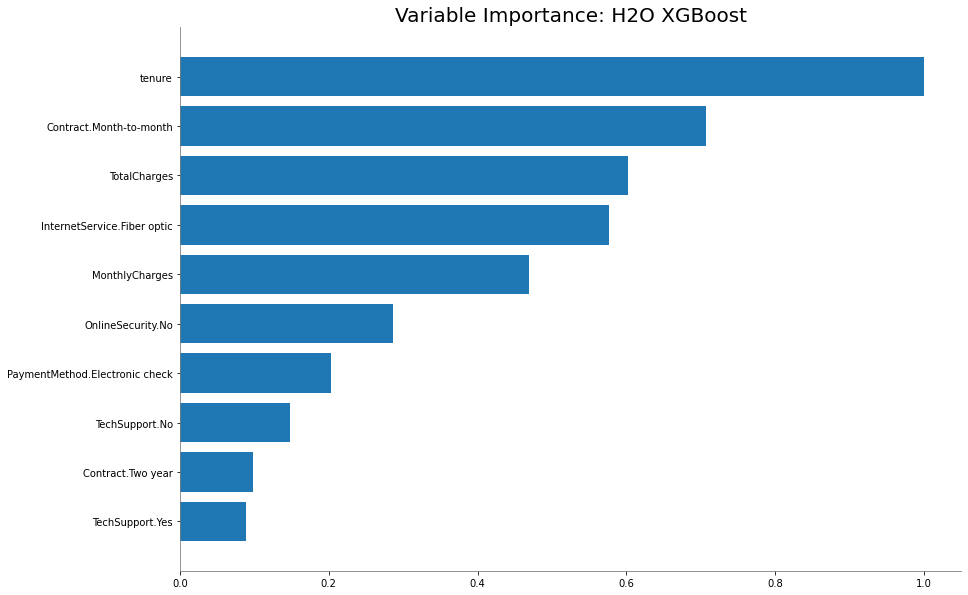

In [35]:
out.varimp_plot()

In [36]:
aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_20210308_122502.zip'